In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter



# Data collecting


In [ ]:
company_ticker = 'ORA.PA'
company_info = yf.Ticker(company_ticker).info
company_info_df = pd.DataFrame(company_info)
company_info_df.iloc[0]

address1             111, quai du Président Roosevelt
address2                                     CS 70222
city                              Issy-les-Moulineaux
zip                                             92449
country                                        France
                                   ...               
grossMargins                                  0.37797
ebitdaMargins                                 0.29745
operatingMargins                              0.15463
financialCurrency                                 EUR
trailingPegRatio                               4.1609
Name: 0, Length: 117, dtype: object

In [ ]:
start_date = '2022-01-01'
end_date = '2024-01-01'
stock_data = yf.download(company_ticker, start_date, end_date)
stock_data.to_csv('stock_data.csv')
df = pd.read_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,9.432,9.495,9.418,9.424,8.269681,6450743
1,2022-01-04,9.461,9.540,9.461,9.490,8.327597,8585931
2,2022-01-05,9.509,9.520,9.401,9.450,8.292496,9980707
3,2022-01-06,9.450,9.463,9.382,9.432,8.276701,10120682
4,2022-01-07,9.434,9.457,9.368,9.429,8.274067,6559974


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,9.432,9.495,9.418,9.424,8.269681,6450743
1,2022-01-04,9.461,9.540,9.461,9.490,8.327597,8585931
2,2022-01-05,9.509,9.520,9.401,9.450,8.292496,9980707
3,2022-01-06,9.450,9.463,9.382,9.432,8.276701,10120682
4,2022-01-07,9.434,9.457,9.368,9.429,8.274067,6559974


In [ ]:
df['Date'] = pd.to_datetime(df.index)


# Visualization
Let's visualize some data about the company

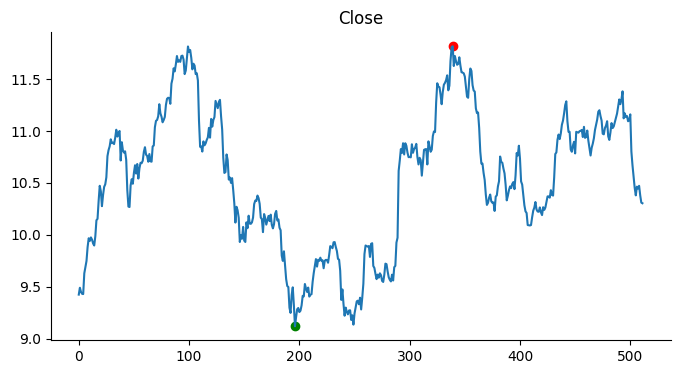

In [ ]:
# @title Close
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)
# Mark all-time high
all_time_high_date = df['Close'].idxmax()
all_time_high_price = df['Close'].max()
plt.scatter(all_time_high_date, all_time_high_price, color='red', label='All Time High')

# Mark all-time low
all_time_low_date = df['Close'].idxmin()
all_time_low_price = df['Close'].min()
plt.scatter(all_time_low_date, all_time_low_price, color='green', label='All Time Low')


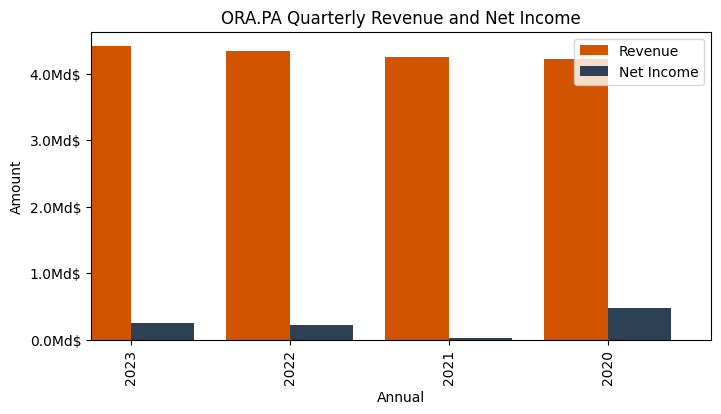

In [ ]:
income_statement = yf.Ticker(company_ticker).financials
# Custom formatting function for y-axis labels
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fMd$' % (x * 1e-10)


# Extracting revenue and net income
revenue = income_statement.iloc[-2]
net_income = income_statement.iloc[25]
years = [d.year for d in income_statement.keys()]
# # Plotting the statement
plt.figure(figsize=(8, 4))
revenue.plot(kind='bar', color='#D35400', width=0.4, position=1, label='Revenue')
net_income.plot(kind='bar', color='#2E4053', width=0.4, position=0, label='Net Income')
plt.title(f'{company_ticker} Quarterly Revenue and Net Income')
plt.xlabel('Annual')
plt.ylabel('Amount')
plt.xticks(range(len(years)), years)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))  # Formatting y-axis labels
plt.legend()
plt.show()




# Spliting the data
We need to split the data to 70% for training and 30% for testing this way we can track how our model is doing



> **Y = ax + b**
So we need to provide the x and Y for the model
1.   The **x** as known the realted data except for Y aka the predictor variable. In our case we are providing the ***open*** ***price***, **low**, **high**, and ***the volume***
2.   The **Y** as the target here is the ***closing price***



In [ ]:
# Extracting numerical representation of date
df['Numerical_Date'] = df['Date'].astype(int)
x = df[['Numerical_Date','Open', 'High', 'Low', 'Volume']]
Y = df['Close']
x.dtypes

Numerical_Date      int64
Open              float64
High              float64
Low               float64
Volume              int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=42)
X_train.head()

,Numerical_Date,Open,High,Low,Volume
420,420,10.236,10.288,10.190,2722299
94,94,11.780,11.806,11.658,5377124
311,311,10.684,10.758,10.570,20039590
406,406,10.214,10.226,10.124,7497183
23,23,10.420,10.518,10.362,9814519


# Training the Model

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

***Plotting results***

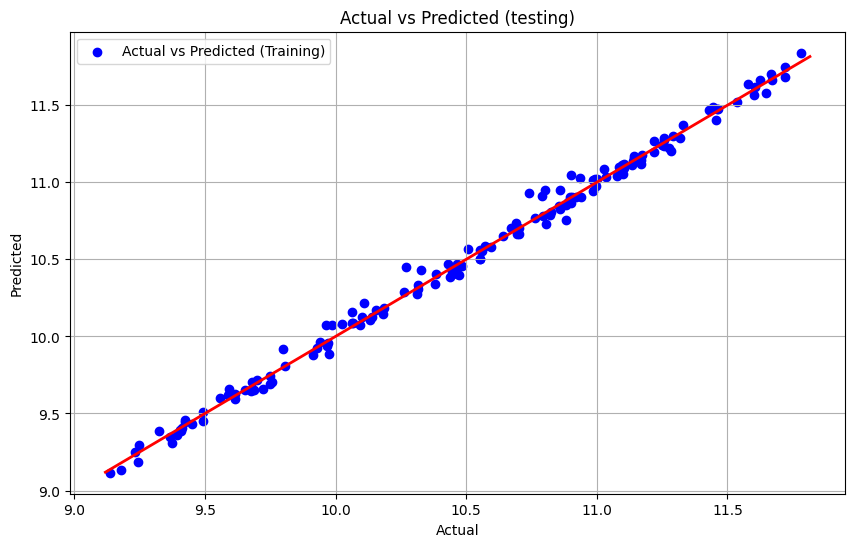

In [ ]:
# Plotting actual vs predicted values for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Actual vs Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (testing)')
plt.legend()
plt.grid(True)
plt.show()

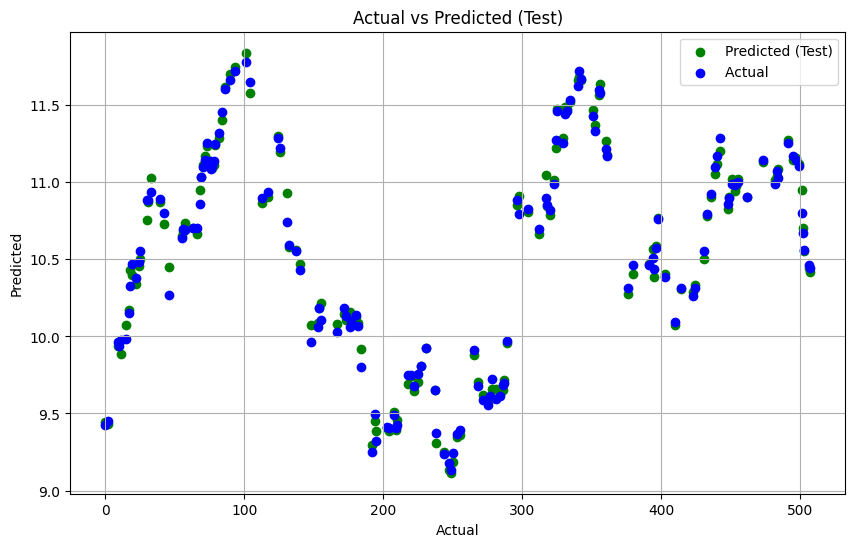

In [ ]:
# Plotting actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_pred_test, color='green', label='Predicted (Test)')
plt.scatter(X_test.index, y_test, color='blue', label='Actual ')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Test)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
lr_model.score(X_test, y_test)

0.9946531383782131